In [1]:
from starccato_flow.nn.cvae import ConditionalVAE

In [2]:
# generate galactic supernovae from simple galactic disk model

# sky = Sky(ra=0.0, dec=0.0)
# supernovae = sky.generate_galactic_supernovae(num_supernovae=10000)

# # plot supernova in 3d plot, and 2d plot
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize=(12, 6))
# ax1 = fig.add_subplot(121, projection='3d')
# ax2 = fig.add_subplot(122)
# x = supernovae[:, 0]
# y = supernovae[:, 1]    
# z = supernovae[:, 2]
# ax1.scatter(x, y, z, s=0.001, alpha=0.1)
# ax1.set_xlabel('X (kpc)')
# ax1.set_ylabel('Y (kpc)')
# ax1.set_zlabel('Z (kpc)')
# ax1.set_title('3D Distribution of Galactic Supernovae')
# ax2.scatter(x, y, s=1)
# ax2.set_xlabel('X (kpc)')
# ax2.set_ylabel('Y (kpc)')
# ax2.set_title('2D Projection of Galactic Supernovae')
# plt.show()

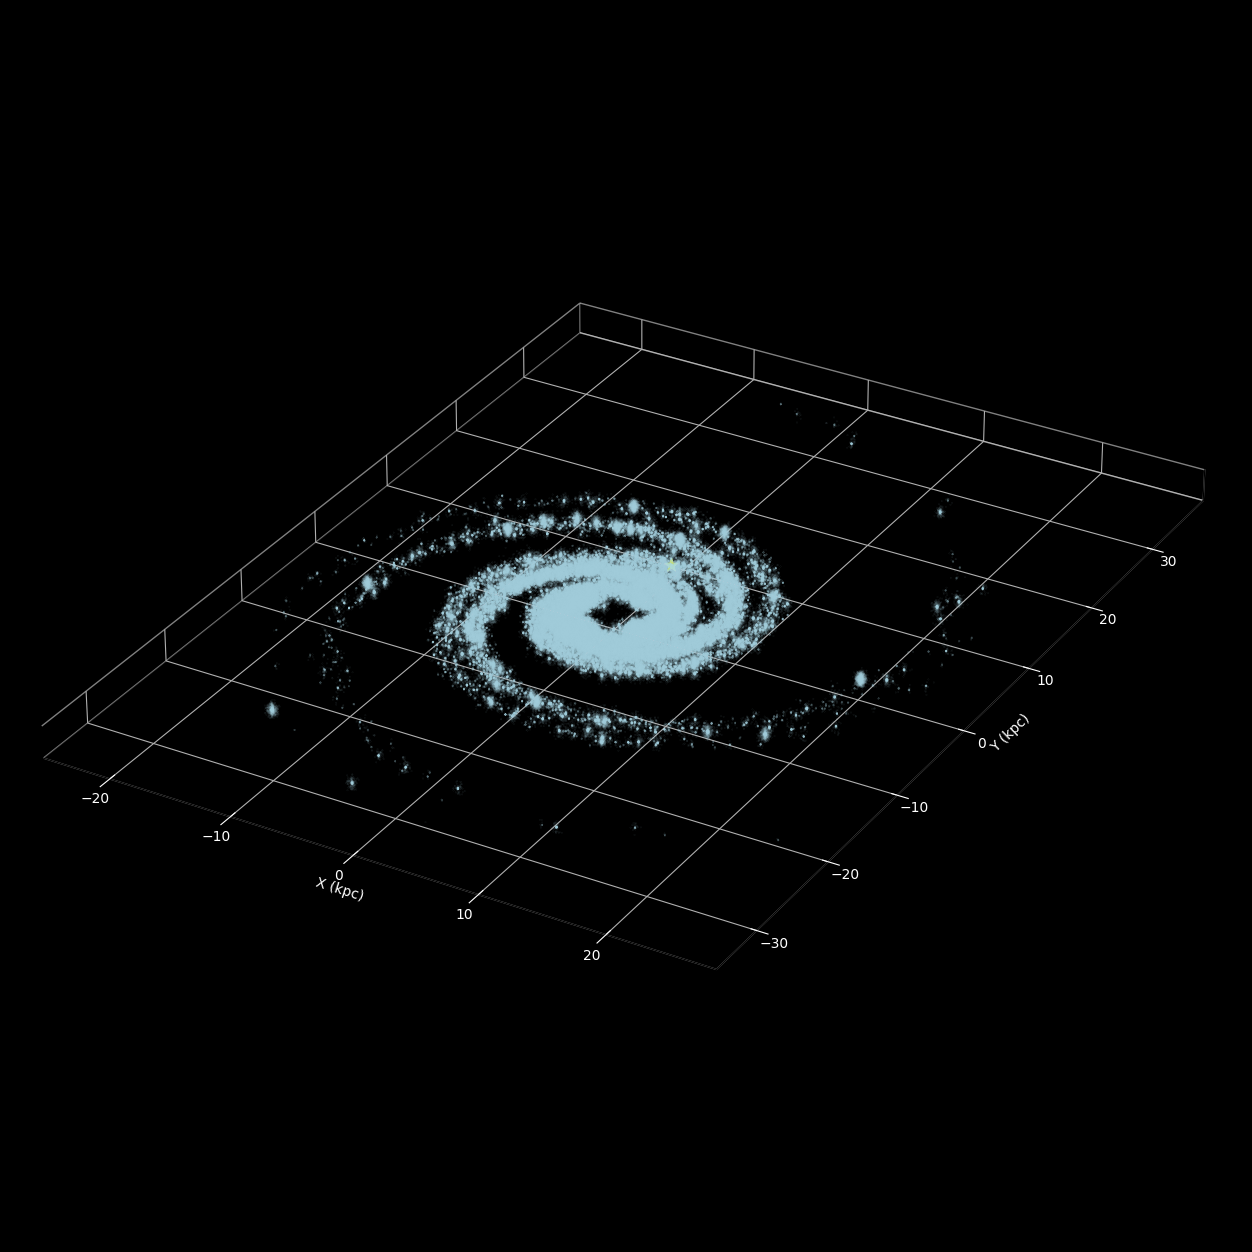

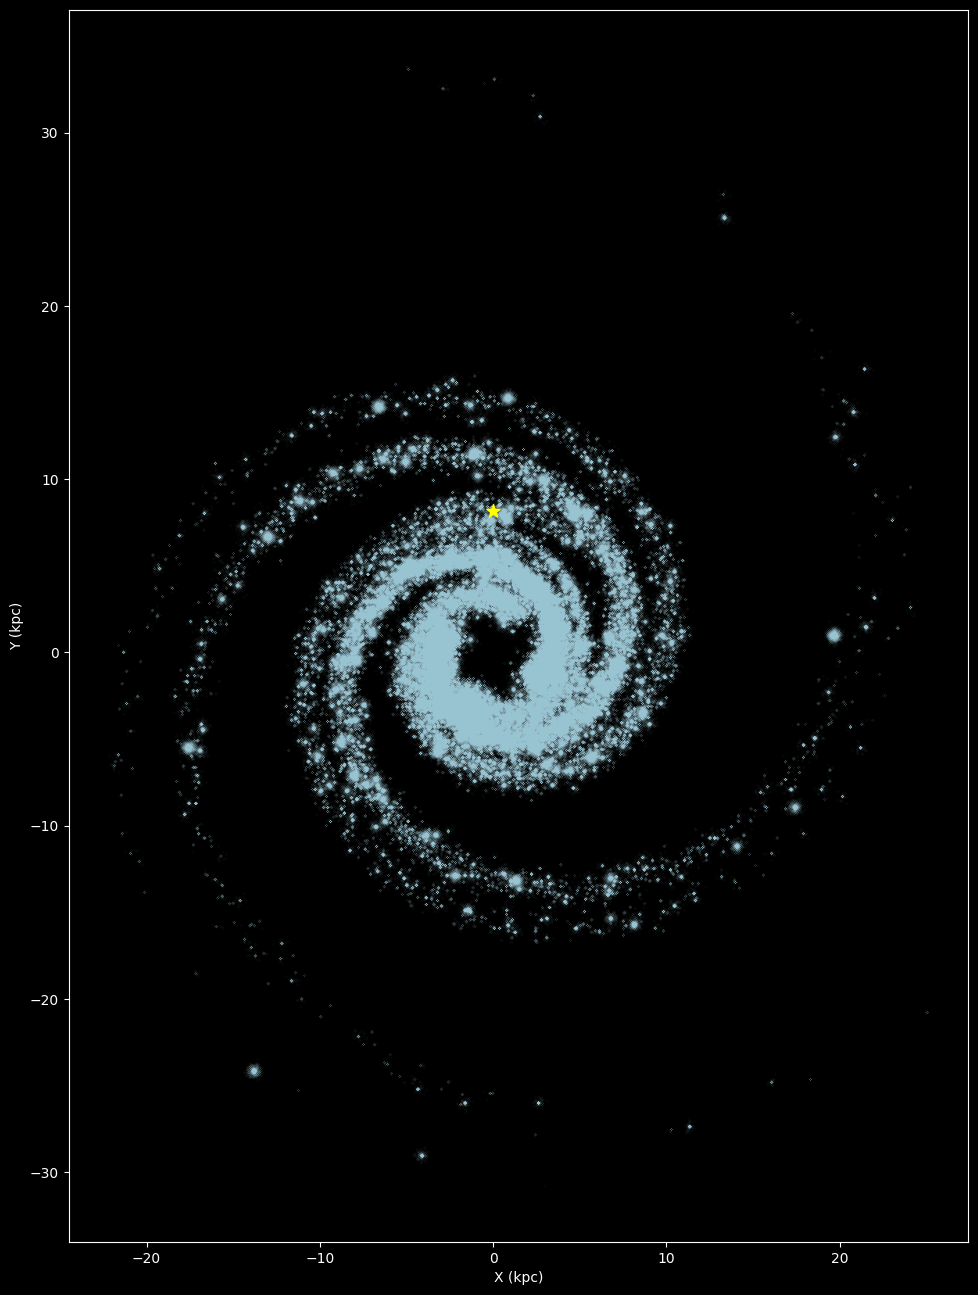

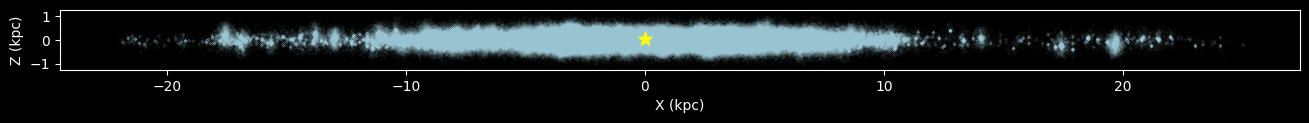

In [3]:
# read file and plot
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
data = pd.read_csv('../../exploded_supernovae_t100_sf5.csv')

x = data['x_kpc'].values
y = data['y_kpc'].values    
z = data['z_kpc'].values

sun_location = [0.0, 8.178, 0.0208]

# 3D Distribution plot
fig1 = plt.figure(figsize=(16, 16), facecolor='black')
ax1 = fig1.add_subplot(111, projection='3d', facecolor='black')
ax1.scatter(x, y, z, s=0.001, alpha=1, c='lightblue')
ax1.scatter(sun_location[0], sun_location[1], sun_location[2], s=100, c='yellow', marker='*', label='Sun')
ax1.set_xlabel('X (kpc)', color='white')
ax1.set_ylabel('Y (kpc)', color='white')
ax1.set_zlabel('Z (kpc)', color='white')
ax1.tick_params(colors='white')
ax1.set_aspect('equal')
ax1.set_zticks([])
# Remove grey panes
ax1.xaxis.pane.set_facecolor('black')
ax1.yaxis.pane.set_facecolor('black')
ax1.zaxis.pane.set_facecolor('black')
ax1.xaxis.pane.set_edgecolor('white')
ax1.yaxis.pane.set_edgecolor('white')
ax1.zaxis.pane.set_edgecolor('white')
ax1.grid(color='gray', alpha=0.2)
# Remove z-axis grid lines
ax1.zaxis._axinfo['grid']['color'] = (0, 0, 0, 0)
# Center x-y plane at z=0 (middle of galaxy)
z_max = max(abs(z.min()), abs(z.max()))
ax1.set_zlim(-z_max, z_max)
plt.show()

# X-Y Projection plot
fig2 = plt.figure(figsize=(16, 16), facecolor='black')
ax2 = fig2.add_subplot(111, facecolor='black')
ax2.scatter(x, y, s=0.001, c='lightblue', alpha=1, marker='o')
ax2.scatter(sun_location[0], sun_location[1], s=100, c='yellow', marker='*', label='Sun')
ax2.set_xlabel('X (kpc)', color='white')
ax2.set_ylabel('Y (kpc)', color='white')
ax2.tick_params(colors='white')
ax2.spines['bottom'].set_color('white')
ax2.spines['left'].set_color('white')
ax2.spines['top'].set_color('white')
ax2.spines['right'].set_color('white')
ax2.set_aspect('equal')
plt.show()

# X-Z Projection plot
fig3 = plt.figure(figsize=(16, 16), facecolor='black')
ax3 = fig3.add_subplot(111, facecolor='black')
ax3.scatter(x, z, s=0.001, c='lightblue', alpha=1)
ax3.scatter(sun_location[0], sun_location[2], s=100, c='yellow', marker='*', label='Sun')
ax3.set_xlabel('X (kpc)', color='white')
ax3.set_ylabel('Z (kpc)', color='white')
ax3.tick_params(colors='white')
ax3.spines['bottom'].set_color('white')
ax3.spines['left'].set_color('white')
ax3.spines['top'].set_color('white')
ax3.spines['right'].set_color('white')
ax3.set_aspect('equal')
plt.show()

In [4]:
# # Sky projection from Sun's perspective
# # Calculate positions relative to the Sun
# x_rel = x - sun_location[0]
# y_rel = y - sun_location[1]
# z_rel = z - sun_location[2]

# # Convert to spherical coordinates
# # The galactic center is in the -y direction from the Sun
# # We want galactic center at RA=0, Dec=0
# # So we rotate the coordinates so that -y axis points to RA=0, Dec=0

# # Calculate distance, RA, and Dec
# distance = np.sqrt(x_rel**2 + y_rel**2 + z_rel**2)

# # Standard astronomical convention: 
# # RA=0, Dec=0 points toward -y direction (galactic center)
# # RA increases counterclockwise when viewed from north
# ra = np.arctan2(x_rel, -y_rel) * 180 / np.pi  # Convert to degrees
# dec = np.arcsin(z_rel / distance) * 180 / np.pi  # Convert to degrees

# # Wrap RA to [0, 360) and convert to [-180, 180) for skymap
# ra = ra % 360
# ra_centered = np.where(ra > 180, ra - 360, ra)

# # Convert to radians for projection
# ra_rad = np.deg2rad(ra_centered)
# dec_rad = np.deg2rad(dec)

# # Create sky projection plot with Mollweide projection
# fig4 = plt.figure(figsize=(16, 10), facecolor='black')
# ax4 = fig4.add_subplot(111, projection='mollweide', facecolor='black')

# # Plot supernovae
# ax4.scatter(ra_rad, dec_rad, s=0.1, c='lightblue', alpha=0.5)

# # Mark galactic center
# ax4.scatter(0, 0, s=200, c='red', marker='x', linewidths=2, label='Galactic Center')

# ax4.set_xlabel('Right Ascension (degrees)', color='white', fontsize=14)
# ax4.set_ylabel('Declination (degrees)', color='white', fontsize=14)
# ax4.set_title('Sky Map of Supernovae from Sun\'s Perspective (Mollweide Projection)', color='white', fontsize=16)
# ax4.tick_params(colors='white')
# ax4.grid(color='gray', alpha=0.3, linestyle='--')
# ax4.legend(facecolor='black', edgecolor='white', labelcolor='white', loc='upper right')

# # Set x-axis labels to degrees
# ax4.set_xticklabels(['180°', '135°', '90°', '45°', '0°', '-45°', '-90°', '-135°', '-180°'], color='white')

# plt.show()

# print(f"Total supernovae plotted: {len(ra)}")
# print(f"RA range: {ra.min():.2f}° to {ra.max():.2f}°")
# print(f"Dec range: {dec.min():.2f}° to {dec.max():.2f}°")

In [5]:
# Load trained CVAE model with weights
import torch
from starccato_flow.utils.defaults import DEVICE

# Define model architecture (must match training parameters)
z_dim = 8  # Latent dimension used during training
hidden_dim = 256  # Hidden layer dimension used during training (not 1024!)
y_length = 256  # Signal length
param_dim = 4  # Number of parameters (beta, omega, A, Ye)

# Instantiate the model
cvae = ConditionalVAE(z_dim=z_dim, hidden_dim=hidden_dim, y_length=y_length, param_dim=param_dim)

# Load trained weights
weights_path = 'outdir/cvae_weights.pt'
cvae.load_state_dict(torch.load(weights_path, map_location=DEVICE))
cvae = cvae.to(DEVICE)
cvae.eval()  # Set to evaluation mode

print(f"✓ Loaded CVAE model from {weights_path}")
print(f"  Architecture: z_dim={z_dim}, hidden_dim={hidden_dim}, param_dim={param_dim}")

MPS device found
✓ Loaded CVAE model from outdir/cvae_weights.pt
  Architecture: z_dim=8, hidden_dim=256, param_dim=4


In [6]:
# Generate signals using uniform prior of parameters
num_samples = 10000

# Parameter ranges: [beta, omega, A, Ye]
min_param_values = np.array([-1, -1, -1, -1])
max_param_values = np.array([1, 1, 1, 1])

# beta = np.random.uniform(-1, 1, num_samples)

# omega = a * beta + b + noise # need to find a and b from training data 

# Generate random parameters uniformly within ranges
params_unif = np.random.uniform(
    min_param_values, 
    max_param_values, 
    size=(num_samples, 4)
)

# Define 5 discrete physical values for A (in km)
discrete_A_physical = np.array([300, 467, 634, 1268.0, 10000.0])  # Physical values in km
print(f"Using 5 discrete A values (physical): {discrete_A_physical} km")

# We need training dataset to get normalization bounds
from starccato_flow.data.ccsn_data import CCSNData
temp_dataset = CCSNData(noise=False, curriculum=False)

# Normalize each discrete A value to [-1, 1] space
# A is at index 2 in the parameter array
A_min = 300
A_max = 10000
discrete_A_normalized = 2 * (discrete_A_physical - A_min) / (A_max - A_min) - 1

print(f"Normalized A values: {discrete_A_normalized}")

# Randomly assign one of the 5 normalized values to each sample
params_unif[:, 2] = np.random.choice(discrete_A_normalized, size=num_samples)

# Create DataFrame
param_df = pd.DataFrame(
    params_unif,
    columns=["beta1_IC_b", "omega_0(rad|s)", "A(km)", "Ye_c_b"]
)

print(f"\nGenerated {num_samples} parameter sets")
print(f"\nParameter ranges:")
print(f"  beta:  [{min_param_values[0]:.3f}, {max_param_values[0]:.3f}] (continuous)")
print(f"  omega: [{min_param_values[1]:.1f}, {max_param_values[1]:.1f}] (continuous)")
print(f"  A:     5 discrete values: {discrete_A_physical} km")
print(f"  Ye:    [{min_param_values[3]:.3f}, {max_param_values[3]:.3f}] (continuous)")
print(f"\nFirst few parameter sets:")
print(param_df.head())
print(f"\nA value distribution (normalized):")
unique, counts = np.unique(params_unif[:, 2], return_counts=True)
for val, count in zip(unique, counts):
    # Convert back to physical for display
    A_physical = (val + 1) / 2 * (A_max - A_min) + A_min
    print(f"  A = {A_physical:.0f} km (norm: {val:.2f}): {count} samples ({100*count/num_samples:.1f}%)")

Using 5 discrete A values (physical): [  300.   467.   634.  1268. 10000.] km
Normalized A values: [-1.         -0.96556701 -0.93113402 -0.80041237  1.        ]

Generated 10000 parameter sets

Parameter ranges:
  beta:  [-1.000, 1.000] (continuous)
  omega: [-1.0, 1.0] (continuous)
  A:     5 discrete values: [  300.   467.   634.  1268. 10000.] km
  Ye:    [-1.000, 1.000] (continuous)

First few parameter sets:
   beta1_IC_b  omega_0(rad|s)     A(km)    Ye_c_b
0    0.639801        0.431604 -0.965567 -0.404896
1    0.319734        0.185258 -0.800412 -0.056992
2    0.649941       -0.477722 -0.931134 -0.367993
3   -0.299182        0.952900 -1.000000  0.180499
4    0.376982        0.756331 -1.000000 -0.017997

A value distribution (normalized):
  A = 300 km (norm: -1.00): 1973 samples (19.7%)
  A = 467 km (norm: -0.97): 2044 samples (20.4%)
  A = 634 km (norm: -0.93): 1993 samples (19.9%)
  A = 1268 km (norm: -0.80): 1993 samples (19.9%)
  A = 10000 km (norm: 1.00): 1997 samples (20.0%)


In [7]:
# Normalize parameters and generate signals from CVAE
from starccato_flow.data.ccsn_data import CCSNData
from starccato_flow.utils.defaults import TEN_KPC

# We need to normalize parameters to [-1, 1] for CVAE
# Use the same normalization as the training data
print("Loading training dataset for normalization...")
training_dataset = CCSNData(noise=False, curriculum=False)

# Normalize the generated parameters
# params_norm = training_dataset.normalize_parameters(params_unif)
params_norm = params_unif

print(f"\nGenerating {num_samples} signals from CVAE...")
# Convert to tensor
params_tensor = torch.tensor(params_norm, dtype=torch.float32).to(DEVICE)
z_samples = torch.randn(num_samples, z_dim).to(DEVICE)

# Generate signals
with torch.no_grad():
    generated_signals = cvae.decoder(z_samples, params_tensor).cpu().numpy()

# Denormalize signals back to physical units
signals_denorm = []
for i in range(num_samples):
    signal_denorm = training_dataset.denormalise_signals(generated_signals[i])
    signals_denorm.append(signal_denorm.flatten())

signals_array = np.array(signals_denorm).T  # Shape: (256, num_samples)

print(f"✓ Generated {num_samples} signals")
print(f"  Signal shape: {signals_array.shape}")
print(f"  Signal range: [{signals_array.min():.2e}, {signals_array.max():.2e}] (in cm)")

Loading training dataset for normalization...

Generating 10000 signals from CVAE...
✓ Generated 10000 signals
  Signal shape: (256, 10000)
  Signal range: [-7.81e+02, 4.62e+02] (in cm)


Plotting signal distribution...


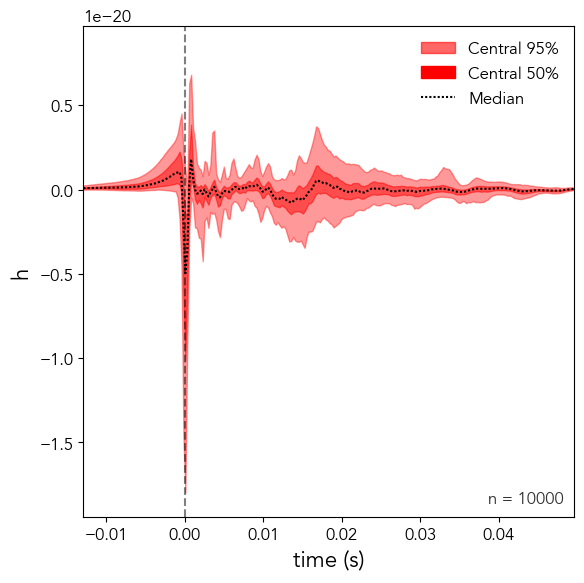

✓ Saved plot to plots/cvae_generated_signal_distribution.svg


In [8]:
# Plot distribution of generated signals
from starccato_flow.plotting import plot_signal_distribution

print("Plotting signal distribution...")
plot_signal_distribution(
    signals=signals_array / TEN_KPC,  # Convert to 10kpc distance
    generated=True,
    background="white",
    font_family="sans-serif",
    font_name="Avenir",
    fname="plots/cvae_generated_signal_distribution.svg"
)
print("✓ Saved plot to plots/cvae_generated_signal_distribution.svg")

Plotting grid of 16 random signals...


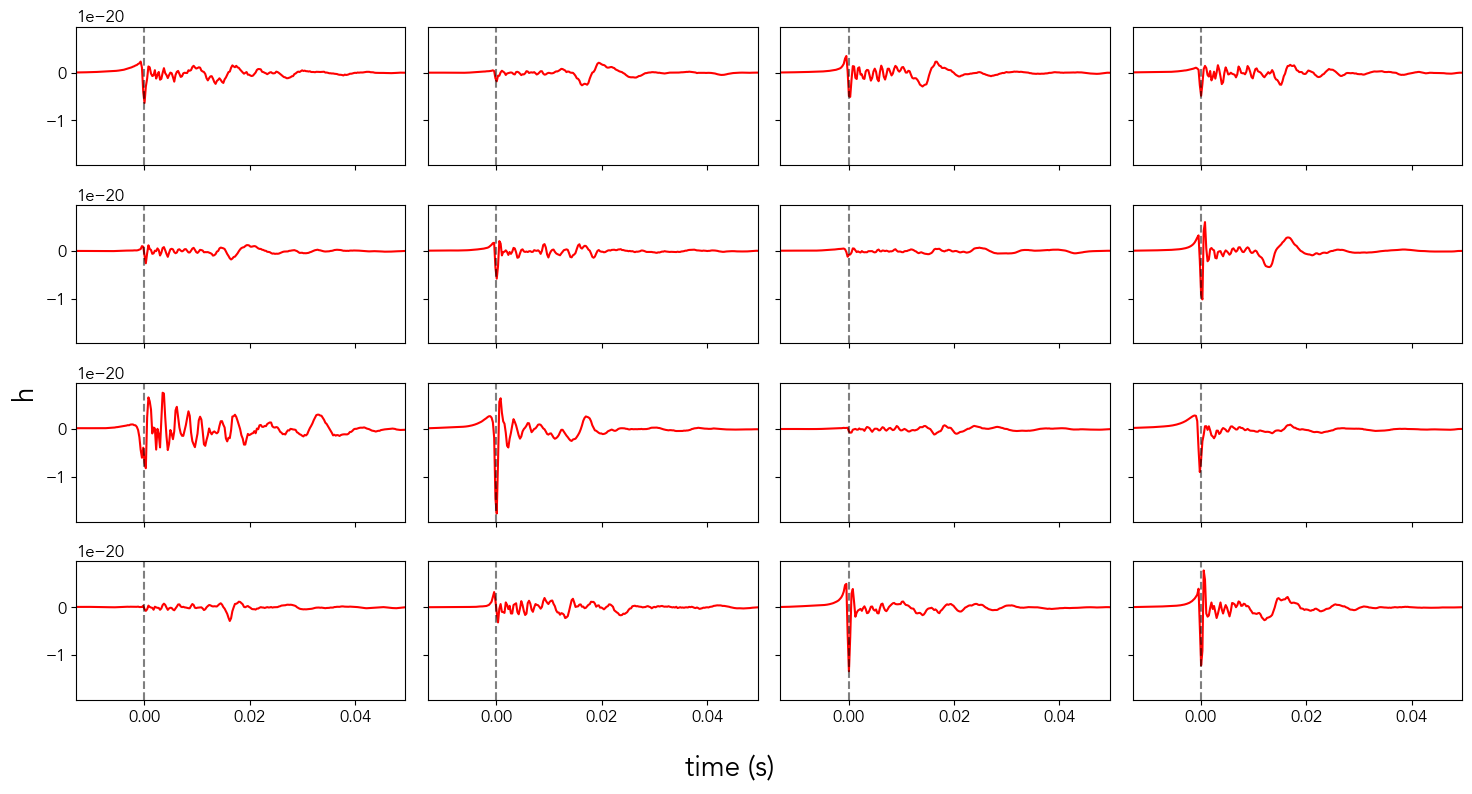

✓ Saved plot to plots/cvae_generated_signal_grid.svg

Displayed signals have parameters:
  Signal 1: β=-0.605, ω=0.76, A=-1, Ye=-0.373
  Signal 2: β=-0.371, ω=-0.70, A=-1, Ye=-0.594
  Signal 3: β=0.062, ω=0.85, A=-1, Ye=-0.348
  Signal 4: β=0.632, ω=-0.76, A=1, Ye=0.923


In [9]:
# Plot a grid of individual signals
from starccato_flow.plotting import plot_signal_grid

# Select 16 random signals to display in a 4x4 grid
num_display = 16
random_indices = np.random.choice(num_samples, size=num_display, replace=False)
selected_signals = signals_array[:, random_indices].T  # Transpose to (num_signals, signal_length)

print(f"Plotting grid of {num_display} random signals...")
plot_signal_grid(
    signals=selected_signals / TEN_KPC,  # Convert to 10kpc distance
    noisy_signals=None,
    num_cols=4,
    num_rows=4,
    fname="plots/cvae_generated_signal_grid.svg",
    max_value=1,
    background="white",
    generated=True,
    font_family="sans-serif",
    font_name="Avenir"
)

print("✓ Saved plot to plots/cvae_generated_signal_grid.svg")
print(f"\nDisplayed signals have parameters:")
for i, idx in enumerate(random_indices[:4]):  # Show first 4
    params = params_unif[idx]
    print(f"  Signal {i+1}: β={params[0]:.3f}, ω={params[1]:.2f}, A={params[2]:.0f}, Ye={params[3]:.3f}")

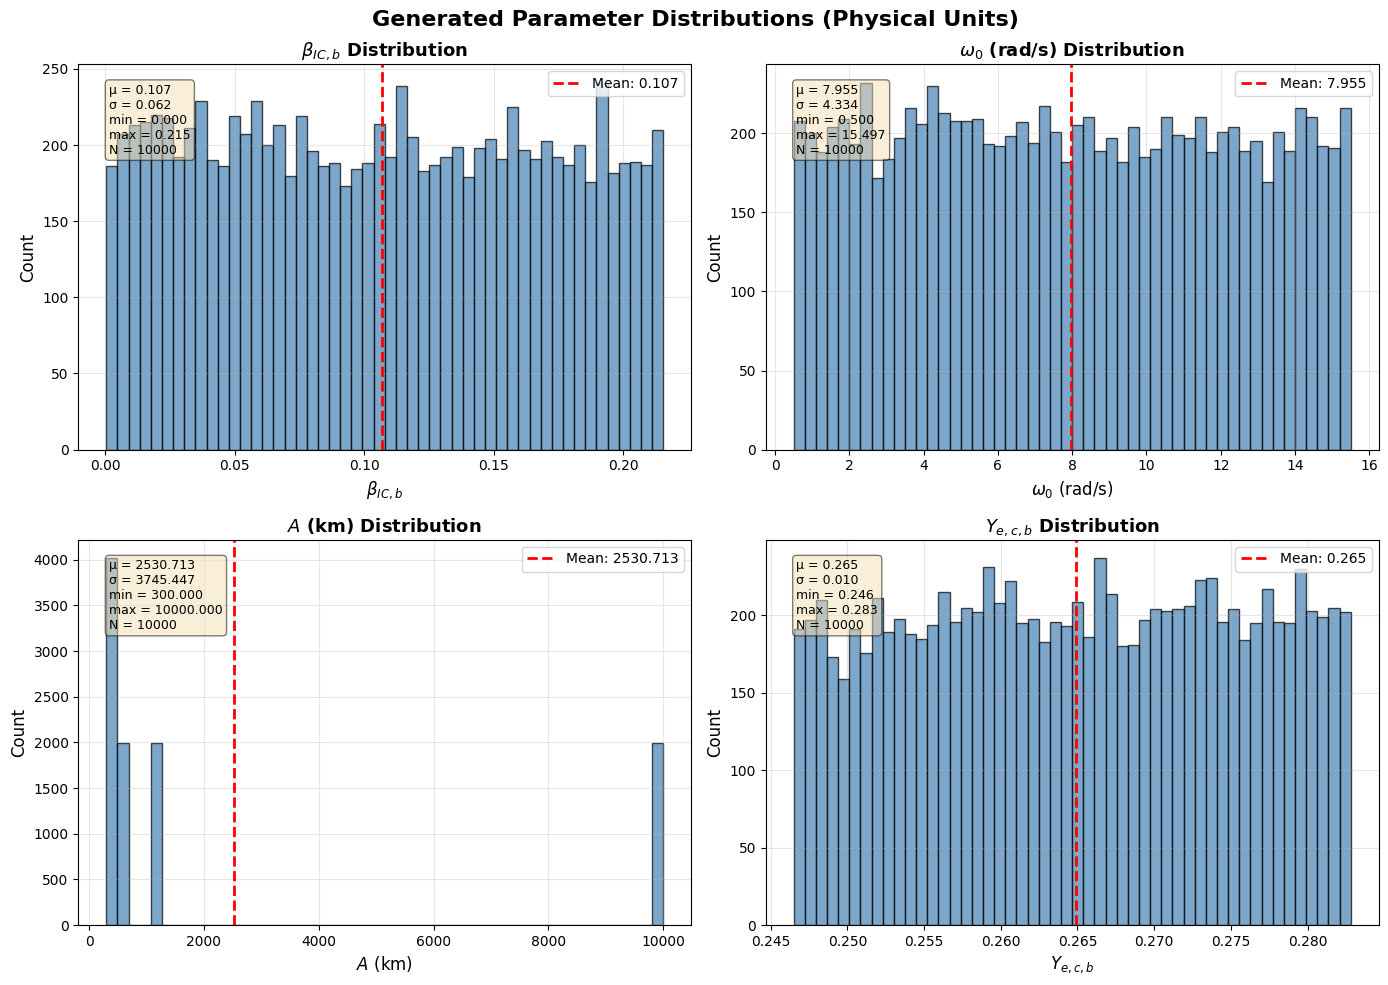

✓ Saved parameter distribution plot to plots/parameter_distributions_physical.svg

Physical parameter ranges:
  $\beta_{IC,b}$: [0.000, 0.215], mean=0.107
  $\omega_0$ (rad/s): [0.500, 15.497], mean=7.955
  $A$ (km): [300.000, 10000.000], mean=2530.713
  $Y_{e,c,b}$: [0.246, 0.283], mean=0.265


In [10]:
# Plot parameter distributions (denormalized)
# Denormalize parameters to physical units
params_physical = training_dataset.denormalize_parameters(params_unif)

# Create DataFrame with physical values
param_df_physical = pd.DataFrame(
    params_physical,
    columns=["beta1_IC_b", "omega_0(rad|s)", "A(km)", "Ye_c_b"]
)

fig, axes = plt.subplots(2, 2, figsize=(14, 10), facecolor='white')
fig.suptitle('Generated Parameter Distributions (Physical Units)', fontsize=16, fontweight='bold')

param_names = ["beta1_IC_b", "omega_0(rad|s)", "A(km)", "Ye_c_b"]
param_labels = [r'$\beta_{IC,b}$', r'$\omega_0$ (rad/s)', r'$A$ (km)', r'$Y_{e,c,b}$']

for i, (name, label) in enumerate(zip(param_names, param_labels)):
    ax = axes[i // 2, i % 2]
    
    values = param_df_physical[name].values
    
    # Plot histogram
    ax.hist(values, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    
    # Add statistics
    mean_val = values.mean()
    std_val = values.std()
    min_val = values.min()
    max_val = values.max()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.3f}')
    
    ax.set_xlabel(label, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(f'{label} Distribution', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=10)
    
    # Add text box with stats
    textstr = f'μ = {mean_val:.3f}\nσ = {std_val:.3f}\nmin = {min_val:.3f}\nmax = {max_val:.3f}\nN = {len(values)}'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', bbox=props)

plt.tight_layout()
plt.savefig('plots/parameter_distributions_physical.svg', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Saved parameter distribution plot to plots/parameter_distributions_physical.svg")
print(f"\nPhysical parameter ranges:")
for name, label in zip(param_names, param_labels):
    vals = param_df_physical[name].values
    print(f"  {label}: [{vals.min():.3f}, {vals.max():.3f}], mean={vals.mean():.3f}")

## Using Custom Generated Data

Now you can create a dataset from your generated signals and parameters:

In [11]:
# Example: Create a CCSNData dataset from your generated signals and parameters
# This allows you to use all the CCSNData methods (plotting, normalization, etc.)
# on your custom generated data

# Option 1: Use custom_data with numpy arrays
# signals_array shape: (signal_length, num_samples) = (256, 10000)
# params_physical shape: (num_samples, num_params) = (10000, 4)

custom_dataset = CCSNData(
    custom_data=(signals_array, params_physical),
    noise=False,
    curriculum=False,
    batch_size=64
)

print(f"✓ Created custom dataset with {len(custom_dataset)} samples")
print(f"  Signal shape: {custom_dataset.signals.shape}")
print(f"  Parameters shape: {custom_dataset.parameters.shape}")
print(f"  Parameter names: {custom_dataset.parameter_names}")

# Now you can use all CCSNData methods:
# custom_dataset.plot_signal_distribution(fname="plots/custom_signals.svg")
# custom_dataset.plot_parameter_distribution("beta1_IC_b", fname="plots/custom_beta.svg")
# custom_dataset.normalize_parameters(params)
# etc.

✓ Created custom dataset with 10000 samples
  Signal shape: (256, 10000)
  Parameters shape: (10000, 4)
  Parameter names: ['beta1_IC_b', 'omega_0(rad|s)', 'A(km)', 'Ye_c_b']


In [12]:
# Option 2: Save and reload your generated data
# Save the generated signals and parameters
np.save('outdir/generated_signals.npy', signals_array)
np.save('outdir/generated_parameters.npy', params_physical)

print("✓ Saved generated data to outdir/")
print("  - generated_signals.npy")
print("  - generated_parameters.npy")

# Later, you can reload and use them:
# loaded_signals = np.load('outdir/generated_signals.npy')
# loaded_params = np.load('outdir/generated_parameters.npy')
# 
# reloaded_dataset = CCSNData(
#     custom_data=(loaded_signals, loaded_params),
#     noise=False,
#     curriculum=False
# )

✓ Saved generated data to outdir/
  - generated_signals.npy
  - generated_parameters.npy


### Using CVAE Validation Indices

If you trained a CVAE and saved the validation indices, you can reuse them for consistency:

In [13]:
# Load validation indices from CVAE training
# cvae_val_indices = np.load('outdir/cvae_val_indices.npy')

# Use the same validation split for Flow Matching training
# This ensures the validation set is consistent across both models
# 
# Example: Generate data excluding validation indices
# train_mask = np.ones(num_samples, dtype=bool)
# train_mask[cvae_val_indices] = False
# training_signals = signals_array[:, train_mask]
# training_params = params_physical[train_mask]
# 
# validation_signals = signals_array[:, cvae_val_indices]
# validation_params = params_physical[cvae_val_indices]

print("✓ Validation indices saved during CVAE training")
print("  Location: outdir/cvae_val_indices.npy")
print("  Use these indices to maintain consistent val sets across models")

✓ Validation indices saved during CVAE training
  Location: outdir/cvae_val_indices.npy
  Use these indices to maintain consistent val sets across models


## Train Flow Matching on Generated Data

Now you can train a Flow Matching model on the CVAE-generated signals:

In [14]:
# Train Flow Matching model on generated CVAE data
from starccato_flow.training.trainer_flow_matching_new import FlowMatchingTrainerNew

# Create trainer with custom generated data
flow_trainer = FlowMatchingTrainerNew(
    custom_data=(signals_array, params_physical),  # Use your generated signals and parameters
    toy=False,  # Not using toy data
    num_epochs=256,
    start_snr=100,
    end_snr=10,
    noise=True,  # Add noise to training
    validation_split=0.1,  # 10% for validation
    curriculum=True,  # Use curriculum learning (gradually decrease SNR)
    noise_realizations=1,  # Number of noise realizations per signal
    batch_size=64,
    lr_flow=5e-4,
    outdir="outdir/flow_matching"
)

print(f"\n✓ Flow Matching trainer initialized")
print(f"  Training on {len(flow_trainer.training_dataset)} samples")
print(f"  Validating on {len(flow_trainer.validation_dataset)} samples")

/Users/tarineccleston/Desktop/starccato/starccato-flow/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



=== Custom Data Split ===
Total samples: 10000
Training samples: 9000
Validation samples: 1000

=== Dataset Sizes ===
Training samples: 9000
Validation samples: 1000

✓ Flow Matching trainer initialized
  Training on 9000 samples
  Validating on 1000 samples


In [15]:
# Start training
flow_trainer.train()

# This will:
# 1. Split your generated data into train/val sets (90/10)
# 2. Train the Flow Matching model to learn parameter distributions
# 3. Use curriculum learning (start with high SNR, gradually decrease to low SNR)
# 4. Save checkpoints every 16 epochs to outdir/flow_matching/
# 5. Track training and validation losses

Epochs:   0%|          | 1/256 [00:13<56:56, 13.40s/it]

Epoch 1/256 | Train MSE Loss: 0.0156 | Val MSE Loss: 0.0202


Epochs:   1%|          | 2/256 [00:22<46:44, 11.04s/it]

Epoch 2/256 | Train MSE Loss: 0.0127 | Val MSE Loss: 0.0269


Epochs:   1%|          | 3/256 [00:32<43:13, 10.25s/it]

Epoch 3/256 | Train MSE Loss: 0.0115 | Val MSE Loss: 0.0343


Epochs:   2%|▏         | 4/256 [00:41<41:32,  9.89s/it]

Epoch 4/256 | Train MSE Loss: 0.0114 | Val MSE Loss: 0.0385


Epochs:   2%|▏         | 5/256 [00:50<40:42,  9.73s/it]

Epoch 5/256 | Train MSE Loss: 0.0111 | Val MSE Loss: 0.0417


Epochs:   2%|▏         | 6/256 [01:00<39:49,  9.56s/it]

Epoch 6/256 | Train MSE Loss: 0.0109 | Val MSE Loss: 0.0358


Epochs:   3%|▎         | 7/256 [01:09<39:26,  9.50s/it]

Epoch 7/256 | Train MSE Loss: 0.0106 | Val MSE Loss: 0.0380


Epochs:   3%|▎         | 8/256 [01:18<39:01,  9.44s/it]

Epoch 8/256 | Train MSE Loss: 0.0102 | Val MSE Loss: 0.0364


Epochs:   4%|▎         | 9/256 [01:28<38:39,  9.39s/it]

Epoch 9/256 | Train MSE Loss: 0.0098 | Val MSE Loss: 0.0324


Epochs:   4%|▍         | 10/256 [01:37<38:28,  9.39s/it]

Epoch 10/256 | Train MSE Loss: 0.0097 | Val MSE Loss: 0.0367


Epochs:   4%|▍         | 11/256 [01:46<38:09,  9.34s/it]

Epoch 11/256 | Train MSE Loss: 0.0095 | Val MSE Loss: 0.0354


Epochs:   5%|▍         | 12/256 [01:56<38:04,  9.36s/it]

Epoch 12/256 | Train MSE Loss: 0.0094 | Val MSE Loss: 0.0345


Epochs:   5%|▌         | 13/256 [02:05<37:54,  9.36s/it]

Epoch 13/256 | Train MSE Loss: 0.0090 | Val MSE Loss: 0.0348


Epochs:   5%|▌         | 14/256 [02:14<37:43,  9.35s/it]

Epoch 14/256 | Train MSE Loss: 0.0088 | Val MSE Loss: 0.0350


Epochs:   6%|▌         | 15/256 [02:24<37:34,  9.35s/it]

Epoch 15/256 | Train MSE Loss: 0.0086 | Val MSE Loss: 0.0293


Epochs:   6%|▋         | 16/256 [02:33<37:12,  9.30s/it]

Epoch 16/256 | Train MSE Loss: 0.0086 | Val MSE Loss: 0.0318


Epochs:   7%|▋         | 17/256 [02:42<36:59,  9.29s/it]

Epoch 17/256 | Train MSE Loss: 0.0084 | Val MSE Loss: 0.0322


Epochs:   7%|▋         | 18/256 [02:51<36:57,  9.32s/it]

Epoch 18/256 | Train MSE Loss: 0.0081 | Val MSE Loss: 0.0321


Epochs:   7%|▋         | 19/256 [03:01<36:37,  9.27s/it]

Epoch 19/256 | Train MSE Loss: 0.0081 | Val MSE Loss: 0.0342


Epochs:   8%|▊         | 20/256 [03:10<36:34,  9.30s/it]

Epoch 20/256 | Train MSE Loss: 0.0080 | Val MSE Loss: 0.0324


Epochs:   8%|▊         | 21/256 [03:19<36:19,  9.27s/it]

Epoch 21/256 | Train MSE Loss: 0.0077 | Val MSE Loss: 0.0322


Epochs:   9%|▊         | 22/256 [03:28<36:05,  9.25s/it]

Epoch 22/256 | Train MSE Loss: 0.0079 | Val MSE Loss: 0.0326


Epochs:   9%|▉         | 23/256 [03:38<35:55,  9.25s/it]

Epoch 23/256 | Train MSE Loss: 0.0076 | Val MSE Loss: 0.0356


Epochs:   9%|▉         | 24/256 [03:47<35:41,  9.23s/it]

Epoch 24/256 | Train MSE Loss: 0.0076 | Val MSE Loss: 0.0329


Epochs:  10%|▉         | 25/256 [03:56<35:35,  9.25s/it]

Epoch 25/256 | Train MSE Loss: 0.0076 | Val MSE Loss: 0.0305


Epochs:  10%|█         | 26/256 [04:06<35:39,  9.30s/it]

Epoch 26/256 | Train MSE Loss: 0.0076 | Val MSE Loss: 0.0334


Epochs:  11%|█         | 27/256 [04:15<35:36,  9.33s/it]

Epoch 27/256 | Train MSE Loss: 0.0075 | Val MSE Loss: 0.0311


Epochs:  11%|█         | 28/256 [04:24<35:18,  9.29s/it]

Epoch 28/256 | Train MSE Loss: 0.0075 | Val MSE Loss: 0.0341


Epochs:  11%|█▏        | 29/256 [04:33<35:08,  9.29s/it]

Epoch 29/256 | Train MSE Loss: 0.0074 | Val MSE Loss: 0.0339


Epochs:  12%|█▏        | 30/256 [04:43<34:56,  9.28s/it]

Epoch 30/256 | Train MSE Loss: 0.0071 | Val MSE Loss: 0.0308


Epochs:  12%|█▏        | 31/256 [04:52<34:25,  9.18s/it]

Epoch 31/256 | Train MSE Loss: 0.0072 | Val MSE Loss: 0.0307


Epochs:  12%|█▎        | 32/256 [04:59<32:38,  8.74s/it]

Epoch 32/256 | Train MSE Loss: 0.0071 | Val MSE Loss: 0.0337


Epochs:  13%|█▎        | 33/256 [05:08<32:08,  8.65s/it]

Epoch 33/256 | Train MSE Loss: 0.0072 | Val MSE Loss: 0.0346


Epochs:  13%|█▎        | 34/256 [05:16<31:46,  8.59s/it]

Epoch 34/256 | Train MSE Loss: 0.0071 | Val MSE Loss: 0.0351


Epochs:  14%|█▎        | 35/256 [05:25<31:31,  8.56s/it]

Epoch 35/256 | Train MSE Loss: 0.0070 | Val MSE Loss: 0.0325


Epochs:  14%|█▍        | 36/256 [05:33<31:23,  8.56s/it]

Epoch 36/256 | Train MSE Loss: 0.0070 | Val MSE Loss: 0.0321


Epochs:  14%|█▍        | 37/256 [05:41<30:49,  8.44s/it]

Epoch 37/256 | Train MSE Loss: 0.0069 | Val MSE Loss: 0.0339


Epochs:  15%|█▍        | 38/256 [05:50<30:45,  8.47s/it]

Epoch 38/256 | Train MSE Loss: 0.0070 | Val MSE Loss: 0.0331


Epochs:  15%|█▌        | 39/256 [05:59<30:47,  8.51s/it]

Epoch 39/256 | Train MSE Loss: 0.0069 | Val MSE Loss: 0.0338


Epochs:  16%|█▌        | 40/256 [06:07<30:55,  8.59s/it]

Epoch 40/256 | Train MSE Loss: 0.0067 | Val MSE Loss: 0.0324


Epochs:  16%|█▌        | 41/256 [06:15<29:52,  8.34s/it]

Epoch 41/256 | Train MSE Loss: 0.0067 | Val MSE Loss: 0.0314


Epochs:  16%|█▋        | 42/256 [06:24<29:56,  8.39s/it]

Epoch 42/256 | Train MSE Loss: 0.0066 | Val MSE Loss: 0.0330


Epochs:  17%|█▋        | 43/256 [06:32<30:09,  8.50s/it]

Epoch 43/256 | Train MSE Loss: 0.0066 | Val MSE Loss: 0.0319


Epochs:  17%|█▋        | 44/256 [06:43<32:34,  9.22s/it]

Epoch 44/256 | Train MSE Loss: 0.0067 | Val MSE Loss: 0.0302


Epochs:  18%|█▊        | 45/256 [06:53<32:45,  9.31s/it]

Epoch 45/256 | Train MSE Loss: 0.0067 | Val MSE Loss: 0.0316


Epochs:  18%|█▊        | 46/256 [07:07<37:51, 10.82s/it]

Epoch 46/256 | Train MSE Loss: 0.0066 | Val MSE Loss: 0.0291


Epochs:  18%|█▊        | 47/256 [07:20<39:34, 11.36s/it]

Epoch 47/256 | Train MSE Loss: 0.0066 | Val MSE Loss: 0.0310


Epochs:  19%|█▉        | 48/256 [07:29<37:30, 10.82s/it]

Epoch 48/256 | Train MSE Loss: 0.0065 | Val MSE Loss: 0.0281


Epochs:  19%|█▉        | 49/256 [07:42<38:47, 11.25s/it]

Epoch 49/256 | Train MSE Loss: 0.0064 | Val MSE Loss: 0.0282


Epochs:  20%|█▉        | 50/256 [07:51<36:39, 10.68s/it]

Epoch 50/256 | Train MSE Loss: 0.0063 | Val MSE Loss: 0.0284


Epochs:  20%|█▉        | 51/256 [08:00<35:15, 10.32s/it]

Epoch 51/256 | Train MSE Loss: 0.0064 | Val MSE Loss: 0.0271


Epochs:  20%|██        | 52/256 [08:10<34:02, 10.01s/it]

Epoch 52/256 | Train MSE Loss: 0.0064 | Val MSE Loss: 0.0294


Epochs:  21%|██        | 53/256 [08:19<32:53,  9.72s/it]

Epoch 53/256 | Train MSE Loss: 0.0062 | Val MSE Loss: 0.0322


Epochs:  21%|██        | 54/256 [08:28<31:57,  9.49s/it]

Epoch 54/256 | Train MSE Loss: 0.0063 | Val MSE Loss: 0.0286


Epochs:  21%|██▏       | 55/256 [08:37<31:18,  9.35s/it]

Epoch 55/256 | Train MSE Loss: 0.0063 | Val MSE Loss: 0.0286


Epochs:  22%|██▏       | 56/256 [08:46<30:55,  9.28s/it]

Epoch 56/256 | Train MSE Loss: 0.0063 | Val MSE Loss: 0.0285


Epochs:  22%|██▏       | 57/256 [08:55<30:47,  9.28s/it]

Epoch 57/256 | Train MSE Loss: 0.0062 | Val MSE Loss: 0.0278


Epochs:  23%|██▎       | 58/256 [09:04<30:15,  9.17s/it]

Epoch 58/256 | Train MSE Loss: 0.0062 | Val MSE Loss: 0.0277


Epochs:  23%|██▎       | 59/256 [09:13<29:59,  9.14s/it]

Epoch 59/256 | Train MSE Loss: 0.0063 | Val MSE Loss: 0.0245


Epochs:  23%|██▎       | 60/256 [09:22<29:41,  9.09s/it]

Epoch 60/256 | Train MSE Loss: 0.0062 | Val MSE Loss: 0.0262


Epochs:  24%|██▍       | 61/256 [09:31<29:25,  9.06s/it]

Epoch 61/256 | Train MSE Loss: 0.0061 | Val MSE Loss: 0.0278


Epochs:  24%|██▍       | 62/256 [09:40<29:23,  9.09s/it]

Epoch 62/256 | Train MSE Loss: 0.0061 | Val MSE Loss: 0.0290


Epochs:  25%|██▍       | 63/256 [09:54<33:37, 10.45s/it]

Epoch 63/256 | Train MSE Loss: 0.0062 | Val MSE Loss: 0.0262


Epochs:  25%|██▌       | 64/256 [10:03<32:26, 10.14s/it]

Epoch 64/256 | Train MSE Loss: 0.0060 | Val MSE Loss: 0.0260


Epochs:  25%|██▌       | 65/256 [10:13<31:27,  9.88s/it]

Epoch 65/256 | Train MSE Loss: 0.0061 | Val MSE Loss: 0.0270


Epochs:  26%|██▌       | 66/256 [10:21<30:19,  9.57s/it]

Epoch 66/256 | Train MSE Loss: 0.0060 | Val MSE Loss: 0.0277


Epochs:  26%|██▌       | 67/256 [10:31<29:50,  9.47s/it]

Epoch 67/256 | Train MSE Loss: 0.0058 | Val MSE Loss: 0.0254


Epochs:  27%|██▋       | 68/256 [10:40<29:29,  9.41s/it]

Epoch 68/256 | Train MSE Loss: 0.0059 | Val MSE Loss: 0.0274


Epochs:  27%|██▋       | 69/256 [10:49<28:52,  9.26s/it]

Epoch 69/256 | Train MSE Loss: 0.0059 | Val MSE Loss: 0.0278


Epochs:  27%|██▋       | 70/256 [10:58<28:33,  9.21s/it]

Epoch 70/256 | Train MSE Loss: 0.0058 | Val MSE Loss: 0.0251


Epochs:  28%|██▊       | 71/256 [11:07<28:17,  9.17s/it]

Epoch 71/256 | Train MSE Loss: 0.0058 | Val MSE Loss: 0.0286


Epochs:  28%|██▊       | 72/256 [11:16<28:02,  9.14s/it]

Epoch 72/256 | Train MSE Loss: 0.0058 | Val MSE Loss: 0.0253


Epochs:  29%|██▊       | 73/256 [11:25<27:45,  9.10s/it]

Epoch 73/256 | Train MSE Loss: 0.0059 | Val MSE Loss: 0.0276


Epochs:  29%|██▉       | 74/256 [11:34<27:38,  9.11s/it]

Epoch 74/256 | Train MSE Loss: 0.0059 | Val MSE Loss: 0.0275


Epochs:  29%|██▉       | 75/256 [11:43<27:33,  9.13s/it]

Epoch 75/256 | Train MSE Loss: 0.0058 | Val MSE Loss: 0.0271


Epochs:  30%|██▉       | 76/256 [11:52<27:19,  9.11s/it]

Epoch 76/256 | Train MSE Loss: 0.0056 | Val MSE Loss: 0.0250


Epochs:  30%|███       | 77/256 [12:01<27:05,  9.08s/it]

Epoch 77/256 | Train MSE Loss: 0.0058 | Val MSE Loss: 0.0268


Epochs:  30%|███       | 78/256 [12:11<27:02,  9.12s/it]

Epoch 78/256 | Train MSE Loss: 0.0057 | Val MSE Loss: 0.0246


Epochs:  31%|███       | 79/256 [12:20<26:49,  9.09s/it]

Epoch 79/256 | Train MSE Loss: 0.0056 | Val MSE Loss: 0.0242


Epochs:  31%|███▏      | 80/256 [12:29<26:36,  9.07s/it]

Epoch 80/256 | Train MSE Loss: 0.0057 | Val MSE Loss: 0.0238


Epochs:  32%|███▏      | 81/256 [12:38<26:29,  9.08s/it]

Epoch 81/256 | Train MSE Loss: 0.0055 | Val MSE Loss: 0.0247


Epochs:  32%|███▏      | 82/256 [12:47<26:17,  9.07s/it]

Epoch 82/256 | Train MSE Loss: 0.0056 | Val MSE Loss: 0.0241


Epochs:  32%|███▏      | 83/256 [12:56<26:13,  9.10s/it]

Epoch 83/256 | Train MSE Loss: 0.0055 | Val MSE Loss: 0.0257


Epochs:  33%|███▎      | 84/256 [13:05<25:58,  9.06s/it]

Epoch 84/256 | Train MSE Loss: 0.0056 | Val MSE Loss: 0.0275


Epochs:  33%|███▎      | 85/256 [13:14<25:46,  9.04s/it]

Epoch 85/256 | Train MSE Loss: 0.0055 | Val MSE Loss: 0.0256


Epochs:  34%|███▎      | 86/256 [13:23<25:35,  9.03s/it]

Epoch 86/256 | Train MSE Loss: 0.0055 | Val MSE Loss: 0.0240


Epochs:  34%|███▍      | 87/256 [13:32<25:28,  9.05s/it]

Epoch 87/256 | Train MSE Loss: 0.0055 | Val MSE Loss: 0.0259


Epochs:  34%|███▍      | 88/256 [13:41<25:23,  9.07s/it]

Epoch 88/256 | Train MSE Loss: 0.0056 | Val MSE Loss: 0.0240


Epochs:  35%|███▍      | 89/256 [13:50<25:09,  9.04s/it]

Epoch 89/256 | Train MSE Loss: 0.0055 | Val MSE Loss: 0.0234


Epochs:  35%|███▌      | 90/256 [14:00<25:13,  9.12s/it]

Epoch 90/256 | Train MSE Loss: 0.0055 | Val MSE Loss: 0.0231


Epochs:  36%|███▌      | 91/256 [14:16<31:13, 11.36s/it]

Epoch 91/256 | Train MSE Loss: 0.0055 | Val MSE Loss: 0.0218


Epochs:  36%|███▌      | 92/256 [14:26<29:56, 10.96s/it]

Epoch 92/256 | Train MSE Loss: 0.0055 | Val MSE Loss: 0.0240


Epochs:  36%|███▋      | 93/256 [14:36<28:56, 10.65s/it]

Epoch 93/256 | Train MSE Loss: 0.0055 | Val MSE Loss: 0.0236


Epochs:  37%|███▋      | 94/256 [14:46<28:04, 10.40s/it]

Epoch 94/256 | Train MSE Loss: 0.0054 | Val MSE Loss: 0.0252


Epochs:  37%|███▋      | 95/256 [14:56<27:27, 10.23s/it]

Epoch 95/256 | Train MSE Loss: 0.0055 | Val MSE Loss: 0.0234


Epochs:  38%|███▊      | 96/256 [15:11<31:18, 11.74s/it]

Epoch 96/256 | Train MSE Loss: 0.0055 | Val MSE Loss: 0.0239


Epochs:  38%|███▊      | 97/256 [15:21<30:01, 11.33s/it]

Epoch 97/256 | Train MSE Loss: 0.0054 | Val MSE Loss: 0.0238


Epochs:  38%|███▊      | 98/256 [15:37<33:35, 12.76s/it]

Epoch 98/256 | Train MSE Loss: 0.0054 | Val MSE Loss: 0.0227


Epochs:  39%|███▊      | 99/256 [15:47<30:51, 11.79s/it]

Epoch 99/256 | Train MSE Loss: 0.0054 | Val MSE Loss: 0.0242


Epochs:  39%|███▉      | 100/256 [15:56<28:52, 11.11s/it]

Epoch 100/256 | Train MSE Loss: 0.0054 | Val MSE Loss: 0.0230


Epochs:  39%|███▉      | 101/256 [16:06<27:35, 10.68s/it]

Epoch 101/256 | Train MSE Loss: 0.0053 | Val MSE Loss: 0.0233


Epochs:  40%|███▉      | 102/256 [16:21<30:29, 11.88s/it]

Epoch 102/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0214


Epochs:  40%|████      | 103/256 [16:30<28:15, 11.08s/it]

Epoch 103/256 | Train MSE Loss: 0.0054 | Val MSE Loss: 0.0231


Epochs:  41%|████      | 104/256 [16:39<26:42, 10.55s/it]

Epoch 104/256 | Train MSE Loss: 0.0053 | Val MSE Loss: 0.0237


Epochs:  41%|████      | 105/256 [16:48<25:21, 10.08s/it]

Epoch 105/256 | Train MSE Loss: 0.0053 | Val MSE Loss: 0.0233


Epochs:  41%|████▏     | 106/256 [16:57<24:25,  9.77s/it]

Epoch 106/256 | Train MSE Loss: 0.0053 | Val MSE Loss: 0.0224


Epochs:  42%|████▏     | 107/256 [17:06<23:42,  9.55s/it]

Epoch 107/256 | Train MSE Loss: 0.0053 | Val MSE Loss: 0.0218


Epochs:  42%|████▏     | 108/256 [17:16<23:16,  9.43s/it]

Epoch 108/256 | Train MSE Loss: 0.0054 | Val MSE Loss: 0.0207


Epochs:  43%|████▎     | 109/256 [17:25<22:51,  9.33s/it]

Epoch 109/256 | Train MSE Loss: 0.0053 | Val MSE Loss: 0.0217


Epochs:  43%|████▎     | 110/256 [17:34<22:40,  9.32s/it]

Epoch 110/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0211


Epochs:  43%|████▎     | 111/256 [17:44<22:46,  9.42s/it]

Epoch 111/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0218


Epochs:  44%|████▍     | 112/256 [17:53<22:30,  9.38s/it]

Epoch 112/256 | Train MSE Loss: 0.0053 | Val MSE Loss: 0.0215


Epochs:  44%|████▍     | 113/256 [18:02<22:17,  9.35s/it]

Epoch 113/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0195


Epochs:  45%|████▍     | 114/256 [18:11<22:02,  9.32s/it]

Epoch 114/256 | Train MSE Loss: 0.0051 | Val MSE Loss: 0.0206


Epochs:  45%|████▍     | 115/256 [18:23<23:24,  9.96s/it]

Epoch 115/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0222


Epochs:  45%|████▌     | 116/256 [18:33<23:10,  9.93s/it]

Epoch 116/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0218


Epochs:  46%|████▌     | 117/256 [18:43<22:53,  9.88s/it]

Epoch 117/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0210


Epochs:  46%|████▌     | 118/256 [18:52<22:32,  9.80s/it]

Epoch 118/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0217


Epochs:  46%|████▋     | 119/256 [19:01<22:02,  9.65s/it]

Epoch 119/256 | Train MSE Loss: 0.0053 | Val MSE Loss: 0.0223


Epochs:  47%|████▋     | 120/256 [19:11<21:45,  9.60s/it]

Epoch 120/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0212


Epochs:  47%|████▋     | 121/256 [19:20<21:32,  9.58s/it]

Epoch 121/256 | Train MSE Loss: 0.0053 | Val MSE Loss: 0.0213


Epochs:  48%|████▊     | 122/256 [19:30<21:17,  9.53s/it]

Epoch 122/256 | Train MSE Loss: 0.0051 | Val MSE Loss: 0.0188


Epochs:  48%|████▊     | 123/256 [19:39<20:55,  9.44s/it]

Epoch 123/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0203


Epochs:  48%|████▊     | 124/256 [19:51<22:29, 10.22s/it]

Epoch 124/256 | Train MSE Loss: 0.0053 | Val MSE Loss: 0.0181


Epochs:  49%|████▉     | 125/256 [20:01<21:52, 10.02s/it]

Epoch 125/256 | Train MSE Loss: 0.0055 | Val MSE Loss: 0.0220


Epochs:  49%|████▉     | 126/256 [20:13<23:24, 10.80s/it]

Epoch 126/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0201


Epochs:  50%|████▉     | 127/256 [20:23<22:48, 10.61s/it]

Epoch 127/256 | Train MSE Loss: 0.0051 | Val MSE Loss: 0.0178


Epochs:  50%|█████     | 128/256 [20:32<21:33, 10.11s/it]

Epoch 128/256 | Train MSE Loss: 0.0051 | Val MSE Loss: 0.0185


Epochs:  50%|█████     | 129/256 [20:41<20:11,  9.54s/it]

Epoch 129/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0187


Epochs:  51%|█████     | 130/256 [20:49<19:11,  9.14s/it]

Epoch 130/256 | Train MSE Loss: 0.0050 | Val MSE Loss: 0.0190


Epochs:  51%|█████     | 131/256 [20:58<19:01,  9.13s/it]

Epoch 131/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0183


Epochs:  52%|█████▏    | 132/256 [21:07<18:40,  9.04s/it]

Epoch 132/256 | Train MSE Loss: 0.0051 | Val MSE Loss: 0.0183


Epochs:  52%|█████▏    | 133/256 [21:16<18:40,  9.11s/it]

Epoch 133/256 | Train MSE Loss: 0.0051 | Val MSE Loss: 0.0199


Epochs:  52%|█████▏    | 134/256 [21:25<18:33,  9.13s/it]

Epoch 134/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0188


Epochs:  53%|█████▎    | 135/256 [21:34<18:21,  9.10s/it]

Epoch 135/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0185


Epochs:  53%|█████▎    | 136/256 [21:49<21:36, 10.80s/it]

Epoch 136/256 | Train MSE Loss: 0.0050 | Val MSE Loss: 0.0182


Epochs:  54%|█████▎    | 137/256 [21:59<20:50, 10.51s/it]

Epoch 137/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0173


Epochs:  54%|█████▍    | 138/256 [22:08<20:00, 10.17s/it]

Epoch 138/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0189


Epochs:  54%|█████▍    | 139/256 [22:18<19:36, 10.06s/it]

Epoch 139/256 | Train MSE Loss: 0.0051 | Val MSE Loss: 0.0182


Epochs:  55%|█████▍    | 140/256 [22:27<19:00,  9.84s/it]

Epoch 140/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0182


Epochs:  55%|█████▌    | 141/256 [22:37<18:37,  9.72s/it]

Epoch 141/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0190


Epochs:  55%|█████▌    | 142/256 [22:46<18:10,  9.56s/it]

Epoch 142/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0190


Epochs:  56%|█████▌    | 143/256 [22:55<17:50,  9.47s/it]

Epoch 143/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0169


Epochs:  56%|█████▋    | 144/256 [23:05<17:41,  9.48s/it]

Epoch 144/256 | Train MSE Loss: 0.0051 | Val MSE Loss: 0.0189


Epochs:  57%|█████▋    | 145/256 [23:14<17:29,  9.45s/it]

Epoch 145/256 | Train MSE Loss: 0.0051 | Val MSE Loss: 0.0162


Epochs:  57%|█████▋    | 146/256 [23:23<17:08,  9.35s/it]

Epoch 146/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0167


Epochs:  57%|█████▋    | 147/256 [23:32<16:54,  9.31s/it]

Epoch 147/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0189


Epochs:  58%|█████▊    | 148/256 [23:42<16:40,  9.27s/it]

Epoch 148/256 | Train MSE Loss: 0.0051 | Val MSE Loss: 0.0169


Epochs:  58%|█████▊    | 149/256 [23:51<16:32,  9.27s/it]

Epoch 149/256 | Train MSE Loss: 0.0051 | Val MSE Loss: 0.0185


Epochs:  59%|█████▊    | 150/256 [24:00<16:19,  9.24s/it]

Epoch 150/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0194


Epochs:  59%|█████▉    | 151/256 [24:09<16:13,  9.27s/it]

Epoch 151/256 | Train MSE Loss: 0.0050 | Val MSE Loss: 0.0167


Epochs:  59%|█████▉    | 152/256 [24:19<16:11,  9.34s/it]

Epoch 152/256 | Train MSE Loss: 0.0051 | Val MSE Loss: 0.0165


Epochs:  60%|█████▉    | 153/256 [24:28<15:58,  9.30s/it]

Epoch 153/256 | Train MSE Loss: 0.0051 | Val MSE Loss: 0.0175


Epochs:  60%|██████    | 154/256 [24:37<15:44,  9.26s/it]

Epoch 154/256 | Train MSE Loss: 0.0051 | Val MSE Loss: 0.0155


Epochs:  61%|██████    | 155/256 [24:44<14:21,  8.53s/it]

Epoch 155/256 | Train MSE Loss: 0.0051 | Val MSE Loss: 0.0171


Epochs:  61%|██████    | 156/256 [24:51<13:18,  7.99s/it]

Epoch 156/256 | Train MSE Loss: 0.0051 | Val MSE Loss: 0.0169


Epochs:  61%|██████▏   | 157/256 [24:58<12:42,  7.70s/it]

Epoch 157/256 | Train MSE Loss: 0.0051 | Val MSE Loss: 0.0172


Epochs:  62%|██████▏   | 158/256 [25:05<12:20,  7.56s/it]

Epoch 158/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0168


Epochs:  62%|██████▏   | 159/256 [25:12<11:59,  7.42s/it]

Epoch 159/256 | Train MSE Loss: 0.0051 | Val MSE Loss: 0.0166


Epochs:  62%|██████▎   | 160/256 [25:19<11:44,  7.34s/it]

Epoch 160/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0170


Epochs:  63%|██████▎   | 161/256 [25:27<11:35,  7.32s/it]

Epoch 161/256 | Train MSE Loss: 0.0051 | Val MSE Loss: 0.0173


Epochs:  63%|██████▎   | 162/256 [25:34<11:25,  7.29s/it]

Epoch 162/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0162


Epochs:  64%|██████▎   | 163/256 [25:41<11:23,  7.35s/it]

Epoch 163/256 | Train MSE Loss: 0.0051 | Val MSE Loss: 0.0159


Epochs:  64%|██████▍   | 164/256 [25:48<11:07,  7.25s/it]

Epoch 164/256 | Train MSE Loss: 0.0050 | Val MSE Loss: 0.0148


Epochs:  64%|██████▍   | 165/256 [25:56<11:03,  7.30s/it]

Epoch 165/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0155


Epochs:  65%|██████▍   | 166/256 [26:03<10:51,  7.24s/it]

Epoch 166/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0154


Epochs:  65%|██████▌   | 167/256 [26:10<10:42,  7.22s/it]

Epoch 167/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0155


Epochs:  66%|██████▌   | 168/256 [26:17<10:36,  7.24s/it]

Epoch 168/256 | Train MSE Loss: 0.0051 | Val MSE Loss: 0.0157


Epochs:  66%|██████▌   | 169/256 [26:25<10:28,  7.23s/it]

Epoch 169/256 | Train MSE Loss: 0.0051 | Val MSE Loss: 0.0155


Epochs:  66%|██████▋   | 170/256 [26:32<10:20,  7.21s/it]

Epoch 170/256 | Train MSE Loss: 0.0050 | Val MSE Loss: 0.0162


Epochs:  67%|██████▋   | 171/256 [26:39<10:16,  7.25s/it]

Epoch 171/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0162


Epochs:  67%|██████▋   | 172/256 [26:46<10:09,  7.26s/it]

Epoch 172/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0155


Epochs:  68%|██████▊   | 173/256 [26:53<09:59,  7.22s/it]

Epoch 173/256 | Train MSE Loss: 0.0051 | Val MSE Loss: 0.0155


Epochs:  68%|██████▊   | 174/256 [27:01<09:51,  7.22s/it]

Epoch 174/256 | Train MSE Loss: 0.0050 | Val MSE Loss: 0.0143


Epochs:  68%|██████▊   | 175/256 [27:08<09:39,  7.16s/it]

Epoch 175/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0164


Epochs:  69%|██████▉   | 176/256 [27:15<09:34,  7.19s/it]

Epoch 176/256 | Train MSE Loss: 0.0051 | Val MSE Loss: 0.0141


Epochs:  69%|██████▉   | 177/256 [27:22<09:28,  7.20s/it]

Epoch 177/256 | Train MSE Loss: 0.0051 | Val MSE Loss: 0.0145


Epochs:  70%|██████▉   | 178/256 [27:29<09:21,  7.19s/it]

Epoch 178/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0141


Epochs:  70%|██████▉   | 179/256 [27:37<09:17,  7.24s/it]

Epoch 179/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0130


Epochs:  70%|███████   | 180/256 [27:44<09:12,  7.27s/it]

Epoch 180/256 | Train MSE Loss: 0.0051 | Val MSE Loss: 0.0137


Epochs:  71%|███████   | 181/256 [27:51<09:05,  7.27s/it]

Epoch 181/256 | Train MSE Loss: 0.0053 | Val MSE Loss: 0.0139


Epochs:  71%|███████   | 182/256 [27:59<08:57,  7.27s/it]

Epoch 182/256 | Train MSE Loss: 0.0053 | Val MSE Loss: 0.0132


Epochs:  71%|███████▏  | 183/256 [28:06<08:50,  7.27s/it]

Epoch 183/256 | Train MSE Loss: 0.0051 | Val MSE Loss: 0.0135


Epochs:  72%|███████▏  | 184/256 [28:13<08:44,  7.29s/it]

Epoch 184/256 | Train MSE Loss: 0.0051 | Val MSE Loss: 0.0137


Epochs:  72%|███████▏  | 185/256 [28:20<08:38,  7.31s/it]

Epoch 185/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0140


Epochs:  73%|███████▎  | 186/256 [28:28<08:30,  7.30s/it]

Epoch 186/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0133


Epochs:  73%|███████▎  | 187/256 [28:35<08:24,  7.31s/it]

Epoch 187/256 | Train MSE Loss: 0.0051 | Val MSE Loss: 0.0141


Epochs:  73%|███████▎  | 188/256 [28:42<08:17,  7.32s/it]

Epoch 188/256 | Train MSE Loss: 0.0053 | Val MSE Loss: 0.0141


Epochs:  74%|███████▍  | 189/256 [28:50<08:09,  7.30s/it]

Epoch 189/256 | Train MSE Loss: 0.0053 | Val MSE Loss: 0.0136


Epochs:  74%|███████▍  | 190/256 [28:57<08:03,  7.32s/it]

Epoch 190/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0122


Epochs:  75%|███████▍  | 191/256 [29:04<07:56,  7.32s/it]

Epoch 191/256 | Train MSE Loss: 0.0053 | Val MSE Loss: 0.0114


Epochs:  75%|███████▌  | 192/256 [29:12<07:47,  7.30s/it]

Epoch 192/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0123


Epochs:  75%|███████▌  | 193/256 [29:22<08:34,  8.17s/it]

Epoch 193/256 | Train MSE Loss: 0.0054 | Val MSE Loss: 0.0121


Epochs:  76%|███████▌  | 194/256 [29:30<08:23,  8.12s/it]

Epoch 194/256 | Train MSE Loss: 0.0053 | Val MSE Loss: 0.0129


Epochs:  76%|███████▌  | 195/256 [29:39<08:28,  8.33s/it]

Epoch 195/256 | Train MSE Loss: 0.0053 | Val MSE Loss: 0.0124


Epochs:  77%|███████▋  | 196/256 [29:47<08:28,  8.47s/it]

Epoch 196/256 | Train MSE Loss: 0.0053 | Val MSE Loss: 0.0130


Epochs:  77%|███████▋  | 197/256 [29:55<08:11,  8.33s/it]

Epoch 197/256 | Train MSE Loss: 0.0052 | Val MSE Loss: 0.0118


Epochs:  77%|███████▋  | 198/256 [30:04<08:00,  8.28s/it]

Epoch 198/256 | Train MSE Loss: 0.0053 | Val MSE Loss: 0.0127


Epochs:  78%|███████▊  | 199/256 [30:12<07:51,  8.27s/it]

Epoch 199/256 | Train MSE Loss: 0.0054 | Val MSE Loss: 0.0115


Epochs:  78%|███████▊  | 200/256 [30:21<07:53,  8.46s/it]

Epoch 200/256 | Train MSE Loss: 0.0053 | Val MSE Loss: 0.0116


Epochs:  79%|███████▊  | 201/256 [30:29<07:47,  8.51s/it]

Epoch 201/256 | Train MSE Loss: 0.0053 | Val MSE Loss: 0.0117


Epochs:  79%|███████▉  | 202/256 [30:38<07:39,  8.51s/it]

Epoch 202/256 | Train MSE Loss: 0.0053 | Val MSE Loss: 0.0111


Epochs:  79%|███████▉  | 203/256 [30:47<07:41,  8.72s/it]

Epoch 203/256 | Train MSE Loss: 0.0055 | Val MSE Loss: 0.0115


Epochs:  80%|███████▉  | 204/256 [30:55<07:23,  8.53s/it]

Epoch 204/256 | Train MSE Loss: 0.0054 | Val MSE Loss: 0.0117


Epochs:  80%|████████  | 205/256 [31:03<07:07,  8.39s/it]

Epoch 205/256 | Train MSE Loss: 0.0054 | Val MSE Loss: 0.0117


Epochs:  80%|████████  | 206/256 [31:11<06:52,  8.25s/it]

Epoch 206/256 | Train MSE Loss: 0.0054 | Val MSE Loss: 0.0113


Epochs:  81%|████████  | 207/256 [31:19<06:39,  8.15s/it]

Epoch 207/256 | Train MSE Loss: 0.0055 | Val MSE Loss: 0.0109


Epochs:  81%|████████▏ | 208/256 [31:27<06:31,  8.15s/it]

Epoch 208/256 | Train MSE Loss: 0.0054 | Val MSE Loss: 0.0111


Epochs:  82%|████████▏ | 209/256 [31:35<06:23,  8.17s/it]

Epoch 209/256 | Train MSE Loss: 0.0054 | Val MSE Loss: 0.0110


Epochs:  82%|████████▏ | 210/256 [31:43<06:12,  8.09s/it]

Epoch 210/256 | Train MSE Loss: 0.0055 | Val MSE Loss: 0.0102


Epochs:  82%|████████▏ | 211/256 [31:52<06:06,  8.14s/it]

Epoch 211/256 | Train MSE Loss: 0.0054 | Val MSE Loss: 0.0101


Epochs:  83%|████████▎ | 212/256 [31:59<05:53,  8.03s/it]

Epoch 212/256 | Train MSE Loss: 0.0055 | Val MSE Loss: 0.0100


Epochs:  83%|████████▎ | 213/256 [32:07<05:45,  8.04s/it]

Epoch 213/256 | Train MSE Loss: 0.0056 | Val MSE Loss: 0.0107


Epochs:  84%|████████▎ | 214/256 [32:16<05:42,  8.17s/it]

Epoch 214/256 | Train MSE Loss: 0.0055 | Val MSE Loss: 0.0107


Epochs:  84%|████████▍ | 215/256 [32:24<05:31,  8.08s/it]

Epoch 215/256 | Train MSE Loss: 0.0056 | Val MSE Loss: 0.0111


Epochs:  84%|████████▍ | 216/256 [32:32<05:29,  8.24s/it]

Epoch 216/256 | Train MSE Loss: 0.0056 | Val MSE Loss: 0.0107


Epochs:  85%|████████▍ | 217/256 [32:40<05:14,  8.06s/it]

Epoch 217/256 | Train MSE Loss: 0.0056 | Val MSE Loss: 0.0104


Epochs:  85%|████████▌ | 218/256 [32:48<05:01,  7.92s/it]

Epoch 218/256 | Train MSE Loss: 0.0057 | Val MSE Loss: 0.0102


Epochs:  86%|████████▌ | 219/256 [32:56<04:54,  7.97s/it]

Epoch 219/256 | Train MSE Loss: 0.0057 | Val MSE Loss: 0.0105


Epochs:  86%|████████▌ | 220/256 [33:03<04:39,  7.75s/it]

Epoch 220/256 | Train MSE Loss: 0.0055 | Val MSE Loss: 0.0099


Epochs:  86%|████████▋ | 221/256 [33:10<04:28,  7.66s/it]

Epoch 221/256 | Train MSE Loss: 0.0056 | Val MSE Loss: 0.0095


Epochs:  87%|████████▋ | 222/256 [33:18<04:21,  7.70s/it]

Epoch 222/256 | Train MSE Loss: 0.0056 | Val MSE Loss: 0.0098


Epochs:  87%|████████▋ | 223/256 [33:26<04:10,  7.58s/it]

Epoch 223/256 | Train MSE Loss: 0.0057 | Val MSE Loss: 0.0098


Epochs:  88%|████████▊ | 224/256 [33:34<04:07,  7.74s/it]

Epoch 224/256 | Train MSE Loss: 0.0057 | Val MSE Loss: 0.0096


Epochs:  88%|████████▊ | 225/256 [33:51<05:30, 10.66s/it]

Epoch 225/256 | Train MSE Loss: 0.0057 | Val MSE Loss: 0.0090


Epochs:  88%|████████▊ | 226/256 [33:59<04:55,  9.86s/it]

Epoch 226/256 | Train MSE Loss: 0.0058 | Val MSE Loss: 0.0096


Epochs:  89%|████████▊ | 227/256 [34:06<04:23,  9.10s/it]

Epoch 227/256 | Train MSE Loss: 0.0059 | Val MSE Loss: 0.0087


Epochs:  89%|████████▉ | 228/256 [34:14<03:58,  8.53s/it]

Epoch 228/256 | Train MSE Loss: 0.0057 | Val MSE Loss: 0.0090


Epochs:  89%|████████▉ | 229/256 [34:21<03:38,  8.11s/it]

Epoch 229/256 | Train MSE Loss: 0.0057 | Val MSE Loss: 0.0098


Epochs:  90%|████████▉ | 230/256 [34:28<03:23,  7.82s/it]

Epoch 230/256 | Train MSE Loss: 0.0059 | Val MSE Loss: 0.0102


Epochs:  90%|█████████ | 231/256 [34:35<03:10,  7.61s/it]

Epoch 231/256 | Train MSE Loss: 0.0059 | Val MSE Loss: 0.0088


Epochs:  91%|█████████ | 232/256 [34:42<02:58,  7.44s/it]

Epoch 232/256 | Train MSE Loss: 0.0059 | Val MSE Loss: 0.0090


Epochs:  91%|█████████ | 233/256 [34:50<02:53,  7.55s/it]

Epoch 233/256 | Train MSE Loss: 0.0060 | Val MSE Loss: 0.0094


Epochs:  91%|█████████▏| 234/256 [34:58<02:53,  7.87s/it]

Epoch 234/256 | Train MSE Loss: 0.0061 | Val MSE Loss: 0.0093


Epochs:  92%|█████████▏| 235/256 [35:07<02:47,  7.98s/it]

Epoch 235/256 | Train MSE Loss: 0.0060 | Val MSE Loss: 0.0087


Epochs:  92%|█████████▏| 236/256 [35:14<02:38,  7.92s/it]

Epoch 236/256 | Train MSE Loss: 0.0061 | Val MSE Loss: 0.0091


Epochs:  93%|█████████▎| 237/256 [35:22<02:26,  7.74s/it]

Epoch 237/256 | Train MSE Loss: 0.0061 | Val MSE Loss: 0.0089


Epochs:  93%|█████████▎| 238/256 [35:29<02:17,  7.66s/it]

Epoch 238/256 | Train MSE Loss: 0.0061 | Val MSE Loss: 0.0087


Epochs:  93%|█████████▎| 239/256 [35:37<02:09,  7.64s/it]

Epoch 239/256 | Train MSE Loss: 0.0061 | Val MSE Loss: 0.0084


Epochs:  94%|█████████▍| 240/256 [35:44<02:00,  7.54s/it]

Epoch 240/256 | Train MSE Loss: 0.0062 | Val MSE Loss: 0.0080


Epochs:  94%|█████████▍| 241/256 [35:52<01:52,  7.51s/it]

Epoch 241/256 | Train MSE Loss: 0.0062 | Val MSE Loss: 0.0080


Epochs:  95%|█████████▍| 242/256 [35:59<01:46,  7.60s/it]

Epoch 242/256 | Train MSE Loss: 0.0064 | Val MSE Loss: 0.0080


Epochs:  95%|█████████▍| 243/256 [36:07<01:39,  7.63s/it]

Epoch 243/256 | Train MSE Loss: 0.0064 | Val MSE Loss: 0.0087


Epochs:  95%|█████████▌| 244/256 [36:14<01:29,  7.48s/it]

Epoch 244/256 | Train MSE Loss: 0.0064 | Val MSE Loss: 0.0082


Epochs:  96%|█████████▌| 245/256 [36:22<01:24,  7.66s/it]

Epoch 245/256 | Train MSE Loss: 0.0063 | Val MSE Loss: 0.0081


Epochs:  96%|█████████▌| 246/256 [36:31<01:19,  7.95s/it]

Epoch 246/256 | Train MSE Loss: 0.0064 | Val MSE Loss: 0.0079


Epochs:  96%|█████████▋| 247/256 [36:40<01:14,  8.32s/it]

Epoch 247/256 | Train MSE Loss: 0.0065 | Val MSE Loss: 0.0077


Epochs:  97%|█████████▋| 248/256 [36:48<01:04,  8.10s/it]

Epoch 248/256 | Train MSE Loss: 0.0065 | Val MSE Loss: 0.0081


Epochs:  97%|█████████▋| 249/256 [36:55<00:55,  7.98s/it]

Epoch 249/256 | Train MSE Loss: 0.0065 | Val MSE Loss: 0.0078


Epochs:  98%|█████████▊| 250/256 [37:03<00:46,  7.81s/it]

Epoch 250/256 | Train MSE Loss: 0.0065 | Val MSE Loss: 0.0078


Epochs:  98%|█████████▊| 251/256 [37:10<00:38,  7.67s/it]

Epoch 251/256 | Train MSE Loss: 0.0066 | Val MSE Loss: 0.0075


Epochs:  98%|█████████▊| 252/256 [37:18<00:30,  7.58s/it]

Epoch 252/256 | Train MSE Loss: 0.0069 | Val MSE Loss: 0.0084


Epochs:  99%|█████████▉| 253/256 [37:25<00:22,  7.49s/it]

Epoch 253/256 | Train MSE Loss: 0.0069 | Val MSE Loss: 0.0077


Epochs:  99%|█████████▉| 254/256 [37:32<00:14,  7.39s/it]

Epoch 254/256 | Train MSE Loss: 0.0068 | Val MSE Loss: 0.0082


Epochs: 100%|█████████▉| 255/256 [37:40<00:07,  7.55s/it]

Epoch 255/256 | Train MSE Loss: 0.0070 | Val MSE Loss: 0.0079


Epochs: 100%|██████████| 256/256 [37:48<00:00,  8.86s/it]

Epoch 256/256 | Train MSE Loss: 0.0070 | Val MSE Loss: 0.0074
Training Time: 37.80min


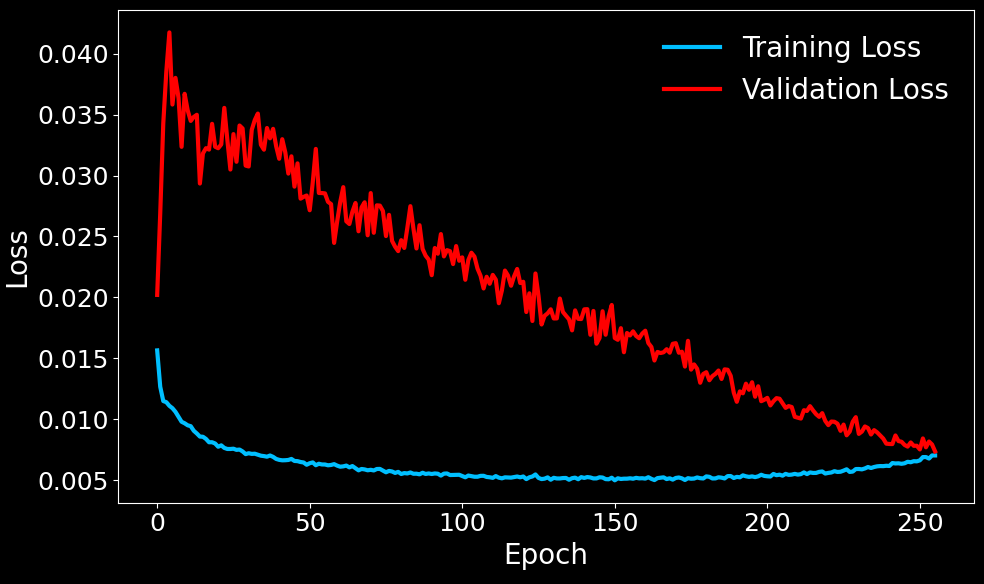

In [16]:
# After training, display results
flow_trainer.display_results()

# This will show:
# - Training and validation loss curves
# - Generated parameter distributions vs training data
# - Corner plots showing parameter correlations

In [17]:
flow_trainer.plot_corner(index=150, fname="plots/corner_plot.svg")

ValueError: 
\A
^
ParseFatalException: Unknown symbol: \A, found '\'  (at char 0), (line:1, col:1)

Error in callback <function _draw_all_if_interactive at 0x137b62160> (for post_execute), with arguments args (),kwargs {}:


ValueError: 
\A
^
ParseFatalException: Unknown symbol: \A, found '\'  (at char 0), (line:1, col:1)

ValueError: 
\A
^
ParseFatalException: Unknown symbol: \A, found '\'  (at char 0), (line:1, col:1)

<Figure size 970x970 with 16 Axes>